In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax.config import config
config.update("jax_enable_x64", True)
from scipy.signal import cont2discrete, lti, dlti, dstep
from scipy import linalg
from scipy.integrate import odeint


[[0. ]
 [0.5]]
[[4.99699090e-05]
 [4.99478436e-03]]


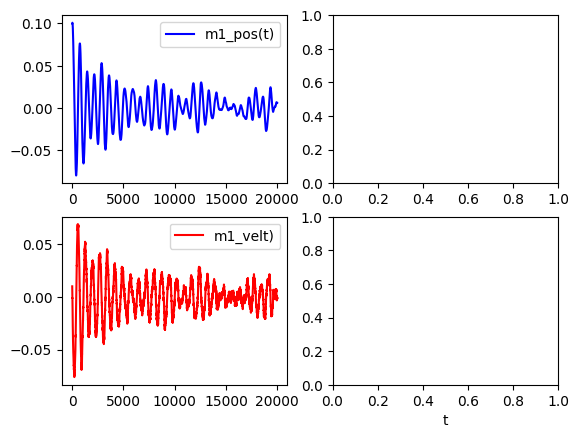

In [688]:
# Continuous Dynamics of two mass spring and damper system
#https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_mdof/vibrations_mdof.htm

#mass
m1 = 2.0

#springs
k1 = 0.5
k2 = 1.0
#damp
l1 = 0.1
l2 = 0.1
q = 0.1

condmat = np.diag(np.array([1,m1]))
linmat=np.array([[0, -1],[(k1+k2), (l1+l2)]])
A = - np.linalg.solve(condmat,linmat)
B = np.array([0,1/m1]).reshape((2,1))

C = np.eye(2)
D = np.zeros((2,1))
print(B)
# Discrete time sys
# l_system = lti(A, B, C, D)
# method in ['zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse']:
dt = 0.01
d_system = cont2discrete((A, B, C, D), dt, method='foh')

Adis = d_system[0]
Bdis = d_system[1]
Cdis = d_system[2]
Ddis = d_system[3]
print(Bdis)
# Simulate System 
# Initial conditions
x0 = np.array([0.1,0.01]).reshape((2,1))  # initial displacement and velocity
x = x0
# Time vector
n = 20000  # start, stop, number of samples
A = Adis
# A[0,2] = 0.0001
# A[1,3] = 0.0001
B = Bdis#np.array([0,0,0,0]).reshape((4,1))
Q = np.inner(B,q*q*B)
F = np.random.normal(loc=0.0, scale=q, size=n)

C = Cdis
R = np.diag(np.array([1.0,1.0]))
for i in range(n-1):
    s1 = np.matmul(A,x0)
    s2 = F[i]*B
    x0 = np.add(s1,s2)
    x  = np.hstack((x,x0))

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
axs[0,0].plot(x[0, :], 'b', label='m1_pos(t)')
axs[0,0].legend()
axs[1,0].plot(x[1, :], 'r', label='m1_velt)')
axs[1,0].legend()
# plt.legend(loc='best')
plt.xlabel('t')
# plt.grid()
plt.show()
# print(F.shape)

In [689]:
d1x = np.copy(x)
A0 = np.copy(A)
C0 = np.copy(C)
Q0 = np.copy(Q)
R0 = np.copy(R)

[[0.  ]
 [0.  ]
 [0.5 ]
 [0.01]]
[[4.99824544e-05]
 [9.99994488e-07]
 [4.99689731e-03]
 [1.00000555e-04]]


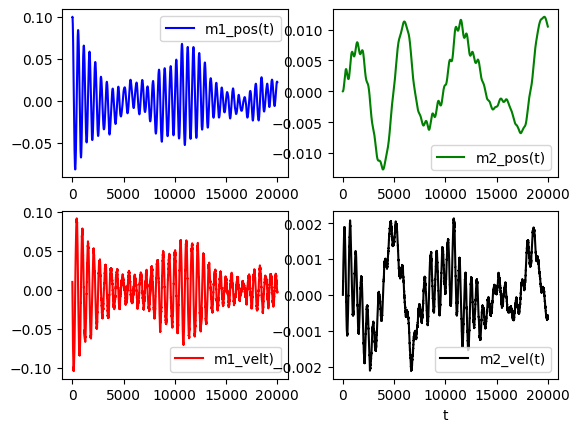

In [286]:
# Continuous Dynamics of two mass spring and damper system
#https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_mdof/vibrations_mdof.htm

#mass
m1 = 2.0
m2 = 100.0
#springs
k1 = 0.5
k2 = 2.0
k3 = 1.0
#damp
l1 = 0.1
l2 = 0.01
l3 = 1.0

condmat = np.diag(np.array([1,1,m1,m2]))
linmat=np.array([[0, 0, -1, 0],[0, 0, 0, -1],[(k1+k2), -k2, (l1+l2), -l2],[-k2, (k2+k3), -l2, (l2+l3)]])
A = - np.linalg.solve(condmat,linmat)
B = np.array([0,0,1/m1,1/m2]).reshape((4,1))

C = np.zeros((2,4))
C[0,0] = 1.0
C[1,1] = 1.0
D = np.zeros((2,1))
print(B)
# Discrete time sys
# l_system = lti(A, B, C, D)
# method in ['zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse']:
dt = 0.01
d_system = cont2discrete((A, B, C, D), dt, method='foh')

Adis = d_system[0]
Bdis = d_system[1]
Cdis = d_system[2]
Ddis = d_system[3]
print(Bdis)
# Simulate System 
# Initial conditions
x0 = np.array([0.1,0.0,0.01,0.0]).reshape((4,1))  # initial displacement and velocity
x = x0
# Time vector
n = 20000  # start, stop, number of samples
A = Adis
# A[0,2] = 0.0001
# A[1,3] = 0.0001
B = Bdis#np.array([0,0,0,0]).reshape((4,1))
q = 0.1
Q = np.inner(B,q*q*B)
F = np.random.normal(loc=0.0, scale=q, size=n)

C = Cdis
R = np.diag(np.array([1.0,1.0]))

for i in range(n-1):
    s1 = np.matmul(A,x0)
    s2 = F[i]*B
    x0 = np.add(s1,s2)
    x  = np.hstack((x,x0))

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
axs[0,0].plot(x[0, :], 'b', label='m1_pos(t)')
axs[0,0].legend()
axs[0,1].plot(x[1, :], 'g', label='m2_pos(t)')
axs[0,1].legend()
axs[1,0].plot(x[2, :], 'r', label='m1_velt)')
axs[1,0].legend()
axs[1,1].plot(x[3, :], 'k', label='m2_vel(t)')
axs[1,1].legend()
# plt.legend(loc='best')
plt.xlabel('t')
# plt.grid()
plt.show()
# print(F.shape)

In [287]:
d2x = np.copy(x)
Astar = np.copy(A)
Cstar = np.copy(C)
Qstar = np.copy(Q)
Rstar = np.copy(R)

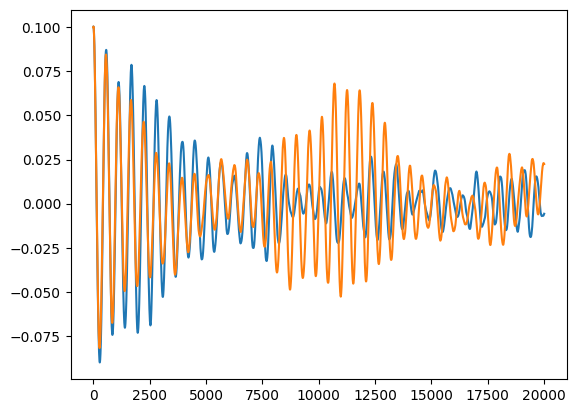

In [288]:
plt.plot(d1x[0,:])
plt.plot(d2x[0,:])

In [739]:
ntestsk = 101
ntestsd = 51
ks = np.logspace(0,3,ntestsk)

ds = np.linspace(0,np.pi/2.0,ntestsd)
EDIs = np.zeros((ntestsk,ntestsd))
EIGs = np.zeros((ntestsk,ntestsd))
for inc in range(0,ntestsk):
    for jnc in range(0,ntestsd):
        ### Null System
        #mass
        m1 = 2.0

        #springs
        k1 = 0.5
        k2 = 1.0
        #damp
        l1 = 0.1
        l2 = 0.1
        q = 0.1

        condmat = np.diag(np.array([1,m1]))
        linmat=np.array([[0, -1],[(k1+k2), (l1+l2)]])
        A = - np.linalg.solve(condmat,linmat)
        B = np.array([0,1/m1]).reshape((2,1))

        C = np.zeros((2,2))
        C[0,0] = np.cos(ds[jnc])
        C[1,1] = np.sin(ds[jnc])
        D = np.zeros((2,1))

        # Discrete time sys
        # l_system = lti(A, B, C, D)
        # method in ['zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse']:
        dt = 0.01
        d_system = cont2discrete((A, B, C, D), dt, method='foh')

        Adis = d_system[0]
        Bdis = d_system[1]
        Cdis = d_system[2]
        Ddis = d_system[3]

        A = Adis
        B = Bdis#np.array([0,0,0,0]).reshape((4,1))
        Q = np.inner(B,q*q*B)

        C = Cdis
        R = np.diag(np.array([0.01,0.0007]))

        A0 = np.copy(A)
        C0 = np.copy(C)
        Q0 = np.copy(Q)
        R0 = np.copy(R)
        M = A0, C0, Q0, R0
        ### End System


        ###STAR SYSTEM
        #mass
        m2 = 100
        #springs
        k3 = ks[inc]
        #damp
        l3 = 1.0

        condmat = np.diag(np.array([1,1,m1,m2]))
        linmat=np.array([[0, 0, -1, 0],[0, 0, 0, -1],[(k1+k2), -k2, (l1+l2), -l2],[-k2, (k2+k3), -l2, (l2+l3)]])
        A = - np.linalg.solve(condmat,linmat)

        #What if noise only drives m1
        B = np.array([0,0,1/m1,0.0]).reshape((4,1))

        C = np.zeros((2,4))
        C[0,0] = np.cos(ds[jnc])
        C[1,2] = np.sin(ds[jnc])
        D = np.zeros((2,1))

        # Discrete time sys
        # l_system = lti(A, B, C, D)
        # method in ['zoh', 'bilinear', 'euler', 'backward_diff', 'foh', 'impulse']:
        dt = 0.01
        d_system = cont2discrete((A, B, C, D), dt, method='foh')

        Adis = d_system[0]
        Bdis = d_system[1]
        Cdis = d_system[2]
        Ddis = d_system[3]

        A = Adis
        B = Bdis#np.array([0,0,0,0]).reshape((4,1))
        Q = np.inner(B,q*q*B)
        C = Cdis

        Astar = np.copy(A)
        Cstar = np.copy(C)
        Qstar = np.copy(Q)
        Rstar = np.copy(R)
        #####END SYSTEM

        Mstar = Astar, Cstar, Qstar, Rstar

        EIGs[inc,jnc] = EIG_inf(M)
        EDIs[inc,jnc] = EDI_inf(M,Mstar)
        

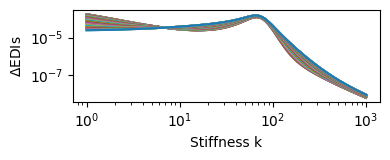

In [740]:
fig, ax = plt.subplots(figsize=(4,1.7))
ax.plot(ks,EDIs)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Stiffness k')
ax.set_ylabel('$\Delta$EDIs')

fig.tight_layout()

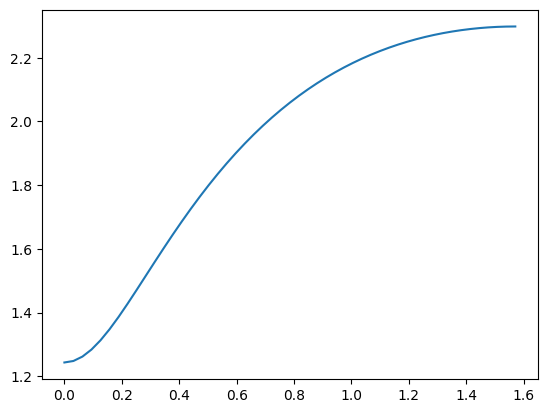

In [664]:
plt.plot(ds,EIGs[0,:])

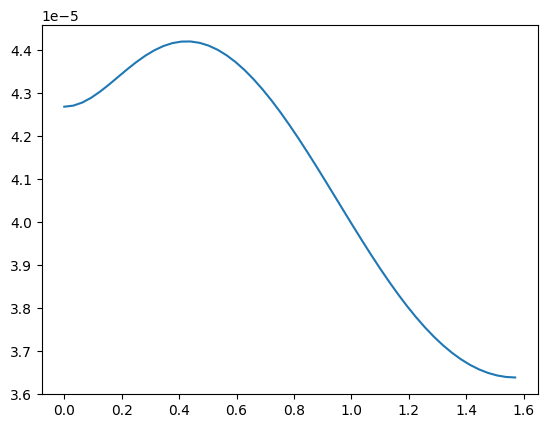

In [665]:
plt.plot(ds,np.mean(EDIs,axis=0))

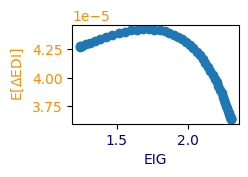

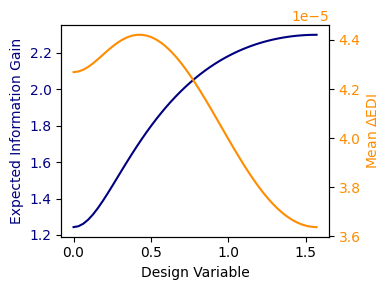

In [714]:
fig, ax = plt.subplots(figsize=(2.5,3/4*2.5))
ax.scatter(EIGs[0,:],np.mean(EDIs,axis=0))
ax.set_xlabel('EIG', color='navy')
ax.tick_params(axis='x', labelcolor='navy')

ax.set_ylabel('E[$\Delta$EDI]', color='darkorange')
ax.tick_params(axis='y', labelcolor='darkorange')
fig.tight_layout()
plt.show()


fig, ax1 = plt.subplots(figsize=(4,3))

color = 'navy'
ax1.set_xlabel('Design Variable')
ax1.set_ylabel('Expected Information Gain', color=color)
ax1.plot(ds,EIGs[0,:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'darkorange'
ax2.set_ylabel('Mean $\Delta$EDI', color=color)  # we already handled the x-label with ax1
ax2.plot(ds,np.mean(EDIs,axis=0), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

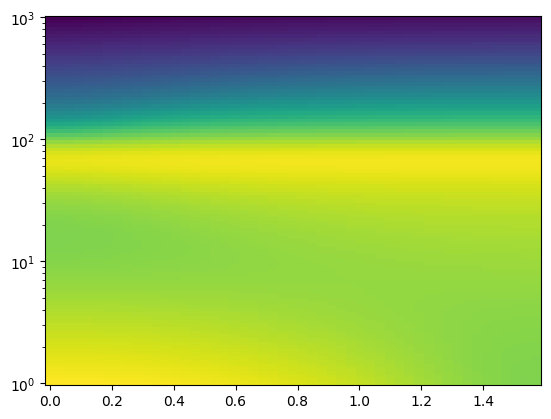

In [671]:
plt.pcolor(ds,ks,np.log(EDIs))
plt.xscale('linear')
plt.yscale('log')

In [586]:
def EIG_inf(M):
    A, H, Q, R = M
    dimx = np.shape(A)[0]
    dimy = np.shape(H)[0]
    # Sig_L, Sig_D
    # Sig_L : Solution to the lyapunov equation Sig_L = A*Sig_L*A'+Q
    Sig_L = linalg.solve_discrete_lyapunov(A, Q, method=None)
    Gamma =  linalg.solve_discrete_are(np.transpose(A), np.transpose(H), Q, R, e=None, s=None, balanced=True)
    #Γ = AΓAt + Q − AΓHT (HΓHT + R)−1HΓAT
    Sig_D_p1 = np.matmul(Gamma,np.transpose(H)) 
    Sig_D_p2inv = np.add(np.matmul(H,np.matmul(Gamma,np.transpose(H))),R)
    if len(Sig_D_p2inv)==1:
        Sig_D_p2 = 1/Sig_D_p2inv
    else:
        #TAC CHANGE
        Sig_D_p2 = np.linalg.solve(Sig_D_p2inv,np.eye(dimy))
    Sig_D_p3 = np.matmul(H,Gamma)
    Sig_D = np.subtract(Gamma,np.matmul(np.matmul(Sig_D_p1,Sig_D_p2),Sig_D_p3))
    sl,ldl = jnp.linalg.slogdet(Sig_L)
    sd,ldd = jnp.linalg.slogdet(Sig_D)
    EIG = 0.5*(ldl-ldd)
    return EIG

In [157]:
def EDI_inf(M,Mstar):
    A, H, Q, R = M
    Astar, Hstar, Qstar, Rstar = Mstar
    dimx = np.shape(A)[0]
    dimxstar = np.shape(Astar)[0]
    dimy = np.shape(H)[0]
    # Sig_L, Sig_D
    # Sig_L : Solution to the lyapunov equation Sig_L = A*Sig_L*A'+Q
    Sig_L = linalg.solve_discrete_lyapunov(A, Q, method=None)
    Sig_L_inv = np.linalg.solve(Sig_L, np.eye(dimx))
    Sig_Lstar = linalg.solve_discrete_lyapunov(Astar, Qstar, method=None)
    # Sig_D : First solve for Gamma
    # scipy.linalg.solve_discrete_are(a, b, q, r, e=None, s=None, balanced=True)
    # A'*X*A + Q - X -(A'XB)(R+B'XB)^{-1}(B'XA)
    Gamma =  linalg.solve_discrete_are(np.transpose(A), np.transpose(H), Q, R, e=None, s=None, balanced=True)
    #Γ = AΓAt + Q − AΓHT (HΓHT + R)−1HΓAT
    Sig_D_p1 = np.matmul(Gamma,np.transpose(H)) 
    Sig_D_p2inv = np.add(np.matmul(H,np.matmul(Gamma,np.transpose(H))),R)
    if len(Sig_D_p2inv)==1:
        Sig_D_p2 = 1/Sig_D_p2inv
    else:
        #TAC CHANGE
        Sig_D_p2 = np.linalg.solve(Sig_D_p2inv,np.eye(dimy))
    Sig_D_p3 = np.matmul(H,Gamma)
    Sig_D = np.subtract(Gamma,np.matmul(np.matmul(Sig_D_p1,Sig_D_p2),Sig_D_p3))
    Sig_D_inv = np.linalg.solve(Sig_D,np.eye(dimx))
    # Gamma - Gamma*H'(H*Gamma*H'+R)^{-1}H*Gamma
    Gammastar =  linalg.solve_discrete_are(np.transpose(Astar), np.transpose(Hstar), Qstar, Rstar, e=None, s=None, balanced=True)
    #Γ = AΓAt + Q − AΓHT (HΓHT + R)−1HΓAT
    Sig_D_p1star = np.matmul(Gammastar,np.transpose(Hstar)) 
    Sig_D_p2invstar = np.add(np.matmul(Hstar,np.matmul(Gammastar,np.transpose(Hstar))),Rstar)
    if len(Sig_D_p2invstar)==1:
        Sig_D_p2star = 1/Sig_D_p2invstar
    else:
        #TAC CHANGE
        Sig_D_p2star = np.linalg.solve(Sig_D_p2invstar,np.eye(dimy))
    Sig_D_p3star = np.matmul(Hstar,Gammastar)
    Sig_Dstar = np.subtract(Gammastar,np.matmul(np.matmul(Sig_D_p1star,Sig_D_p2star),Sig_D_p3star))
    # Gamma - Gamma*H'(H*Gamma*H'+R)^{-1}H*Gamma
    # Calculating Mdelta
    # Abig = [[(I-KH)A KHstar*Astar],[0 Astar]]
    
    S = jnp.add(jnp.matmul(H,jnp.matmul(Gamma,jnp.transpose(H))),R)
    Sstar = jnp.add(jnp.matmul(Hstar,jnp.matmul(Gammastar,jnp.transpose(Hstar))),Rstar)
    S_inv = jnp.linalg.solve(S,jnp.identity(dimy))
    Sstar_inv = jnp.linalg.solve(Sstar,jnp.identity(dimy))
    K = jnp.matmul(Gamma,jnp.matmul(jnp.transpose(H),S_inv))
    Kstar = jnp.matmul(Gammastar,jnp.matmul(jnp.transpose(Hstar),Sstar_inv))
    a11 = np.matmul(np.subtract(np.eye(dimx),np.matmul(K,H)),A)
    a12 = np.matmul(K,np.matmul(Hstar,Astar))
    
    ######TAC Change
    #a21 = np.eye(dimx)
    a21 = np.zeros((dimxstar,dimx))
    
    a22 = Astar
    A1 = np.concatenate((a11,a12),axis=1)
    A2 = np.concatenate((a21,a22),axis=1)
    Asys = np.concatenate((A1,A2),axis=0)
    
    q11 = np.matmul(K,np.matmul(Sstar,np.transpose(K)))
    q12 = np.matmul(K,np.matmul(Sstar,np.transpose(Kstar)))
    q21 = np.matmul(Kstar,np.matmul(Sstar,np.transpose(K)))
    q22 = np.matmul(Kstar,np.matmul(Sstar,np.transpose(Kstar)))
    Q1 = np.concatenate((q11,q12),axis=1)
    Q2 = np.concatenate((q21,q22),axis=1)
    Qsys = np.concatenate((Q1,Q2),axis=0)
    Msys = linalg.solve_discrete_lyapunov(Asys, Qsys, method=None)
    
    maskmat = np.concatenate((-1*np.matmul(H,A),np.matmul(Hstar,Astar)),axis=1)#np.transpose(np.array([[-1*np.eye(dimx)],[np.eye(dimx)]]))
    Ms = np.matmul(maskmat,np.matmul(Msys,np.transpose(maskmat)))
    
    sl,lds = jnp.linalg.slogdet(S)
    sd,ldsstar = jnp.linalg.slogdet(Sstar)

    T1 = 0.5*np.trace(np.linalg.solve(S,Sstar))
    T2 = 0.5*np.trace(np.linalg.solve(S,Ms))
    T3 = 0.5*(lds-ldsstar)
    EDI = T1+T2+T3-0.5*dimy
    return EDI

In [ ]:
def EGIG_inf(M,Mstar):
    A, H, Q, R = M
    Astar, Hstar, Qstar, Rstar = Mstar
    dimx = np.shape(A)[0]
    dimxstar = np.shape(Astar)[0]
    dimy = np.shape(H)[0]
    # Sig_L, Sig_D
    # Sig_L : Solution to the lyapunov equation Sig_L = A*Sig_L*A'+Q
    Sig_L = linalg.solve_discrete_lyapunov(A, Q, method=None)
    Sig_L_inv = np.linalg.solve(Sig_L, np.eye(dimx))
    Sig_Lstar = linalg.solve_discrete_lyapunov(Astar, Qstar, method=None)
    # Sig_D : First solve for Gamma
    # scipy.linalg.solve_discrete_are(a, b, q, r, e=None, s=None, balanced=True)
    # A'*X*A + Q - X -(A'XB)(R+B'XB)^{-1}(B'XA)
    Gamma =  linalg.solve_discrete_are(np.transpose(A), np.transpose(H), Q, R, e=None, s=None, balanced=True)
    #Γ = AΓAt + Q − AΓHT (HΓHT + R)−1HΓAT
    Sig_D_p1 = np.matmul(Gamma,np.transpose(H)) 
    Sig_D_p2inv = np.add(np.matmul(H,np.matmul(Gamma,np.transpose(H))),R)
    if len(Sig_D_p2inv)==1:
        Sig_D_p2 = 1/Sig_D_p2inv
    else:
        #TAC CHANGE
        Sig_D_p2 = np.linalg.solve(Sig_D_p2inv,np.eye(dimy))
    Sig_D_p3 = np.matmul(H,Gamma)
    Sig_D = np.subtract(Gamma,np.matmul(np.matmul(Sig_D_p1,Sig_D_p2),Sig_D_p3))
    Sig_D_inv = np.linalg.solve(Sig_D,np.eye(dimx))
    # Gamma - Gamma*H'(H*Gamma*H'+R)^{-1}H*Gamma
    Gammastar =  linalg.solve_discrete_are(np.transpose(Astar), np.transpose(Hstar), Qstar, Rstar, e=None, s=None, balanced=True)
    #Γ = AΓAt + Q − AΓHT (HΓHT + R)−1HΓAT
    Sig_D_p1star = np.matmul(Gammastar,np.transpose(Hstar)) 
    Sig_D_p2invstar = np.add(np.matmul(Hstar,np.matmul(Gammastar,np.transpose(Hstar))),Rstar)
    if len(Sig_D_p2invstar)==1:
        Sig_D_p2star = 1/Sig_D_p2invstar
    else:
        #TAC CHANGE
        Sig_D_p2star = np.linalg.solve(Sig_D_p2invstar,np.eye(dimy))
    Sig_D_p3star = np.matmul(Hstar,Gammastar)
    Sig_Dstar = np.subtract(Gammastar,np.matmul(np.matmul(Sig_D_p1star,Sig_D_p2star),Sig_D_p3star))
    # Gamma - Gamma*H'(H*Gamma*H'+R)^{-1}H*Gamma
    # Calculating Mdelta
    # Abig = [[(I-KH)A KHstar*Astar],[0 Astar]]
    
    S = jnp.add(jnp.matmul(H,jnp.matmul(Gamma,jnp.transpose(H))),R)
    Sstar = jnp.add(jnp.matmul(Hstar,jnp.matmul(Gammastar,jnp.transpose(Hstar))),Rstar)
    S_inv = jnp.linalg.solve(S,jnp.identity(dimy))
    Sstar_inv = jnp.linalg.solve(Sstar,jnp.identity(dimy))
    K = jnp.matmul(Gamma,jnp.matmul(jnp.transpose(H),S_inv))
    Kstar = jnp.matmul(Gammastar,jnp.matmul(jnp.transpose(Hstar),Sstar_inv))
    a11 = np.matmul(np.subtract(np.eye(dimx),np.matmul(K,H)),A)
    a12 = np.matmul(K,np.matmul(Hstar,Astar))
    
    ######TAC Change
    #a21 = np.eye(dimx)
    a21 = np.zeros((dimxstar,dimx))
    
    a22 = Astar
    A1 = np.concatenate((a11,a12),axis=1)
    A2 = np.concatenate((a21,a22),axis=1)
    Asys = np.concatenate((A1,A2),axis=0)
    
    q11 = np.matmul(K,np.matmul(Sstar,np.transpose(K)))
    q12 = np.matmul(K,np.matmul(Sstar,np.transpose(Kstar)))
    q21 = np.matmul(Kstar,np.matmul(Sstar,np.transpose(K)))
    q22 = np.matmul(Kstar,np.matmul(Sstar,np.transpose(Kstar)))
    Q1 = np.concatenate((q11,q12),axis=1)
    Q2 = np.concatenate((q21,q22),axis=1)
    Qsys = np.concatenate((Q1,Q2),axis=0)
    Msys = linalg.solve_discrete_lyapunov(Asys, Qsys, method=None)
    
    maskmat = np.concatenate((-1*np.eye(dimx),np.eye(dimxstar)),axis=1)#np.transpose(np.array([[-1*np.eye(dimx)],[np.eye(dimx)]]))
    Mdel = np.matmul(maskmat,np.matmul(Msys,np.transpose(maskmat)))
    sl,ldl = jnp.linalg.slogdet(Sig_L)
    sd,ldd = jnp.linalg.slogdet(Sig_D)

    T1 = 0.5*np.trace(np.matmul(Sig_L_inv,Sig_Lstar))
    T2 = -0.5*np.trace(np.matmul(Sig_D_inv,np.add(Sig_Dstar,Mdel)))
    T3 = 0.5*(ldl-ldd)
    EGIG = T1+T2+T3
    return EGIG

In [132]:
# EDI single step calculations
# Parameters needed:
# St, Ststar, dely, k
def EDI_onestep(M,Mstar,k):
    A, H,Sig_prior,Q, R, mu_prior = M
    dimy = np.shape(R)[0]
    Astar, Hstar,Sig_priorstar,Qstar, Rstar, mu_priorstar = Mstar   
    St = np.add(np.matmul(H,np.matmul(Sig_prior,np.transpose(H))),R)
    St_inv = np.linalg.solve(St,np.eye(dimy))
    Ststar = np.add(np.matmul(Hstar,np.matmul(Sig_priorstar,np.transpose(Hstar))),Rstar)
    dely = np.subtract(np.matmul(Hstar,mu_priorstar),np.matmul(H,mu_prior))
    T1 = 0.5*np.trace(np.matmul(St_inv,Ststar))
    sl,ldst = jnp.linalg.slogdet(St)
    sd,ldststar = jnp.linalg.slogdet(Ststar)
    T2 = 0.5*(ldst-ldststar)
    T3 = 0.5*np.matmul(np.transpose(dely),np.matmul(St_inv,dely))
    T4 = -0.5*dimy
    EDI = T1+T2+T3+T4
    return EDI


def EDI_infinite_OG(M,Mstar,k):
    A, H,Sig_prior,Q, R = M
    dimx = np.shape()[0]
    dimy = np.shape(R)[0]
    
    Astar, Hstar,Sig_priorstar,Qstar,Rstar = Mstar   
    St = np.add(np.matmul(H,np.matmul(Sig_prior,np.transpose(H))),R)
    St_inv = np.linalg.solve(St,np.eye(dimy))
    Ststar = np.add(np.matmul(Hstar,np.matmul(Sig_priorstar,np.transpose(Hstar))),Rstar)
    dely = np.subtract(np.matmul(Hstar,mu_priorstar),np.matmul(H,mu_prior))
    T1 = 0.5*np.trace(np.matmul(St_inv,Ststar))
    sl,ldst = jnp.linalg.slogdet(St)
    sd,ldststar = jnp.linalg.slogdet(Ststar)
    T2 = 0.5*(ldst-ldststar)
    # T3 = 0.5*np.matmul(np.transpose(dely),np.matmul(St_inv,dely))
    # Ms
    Ms11 = -1*np.matmul(H,A)
    Ms12 = np.matmul(Hstar,Astar)
    Ms1 = np.concatenate((Ms11,Ms12),axis=1)
    #
    # Sig_L : Solution to the lyapunov equation Sig_L = A*Sig_L*A'+Q
    Sig_L = linalg.solve_discrete_lyapunov(A, Q, method=None)
    Sig_L_inv = np.linalg.solve(Sig_L, np.eye(dimx))
    Sig_Lstar = linalg.solve_discrete_lyapunov(Astar, Qstar, method=None)
    # Sig_D : First solve for Gamma
    # scipy.linalg.solve_discrete_are(a, b, q, r, e=None, s=None, balanced=True)
    # A'*X*A + Q - X -(A'XB)(R+B'XB)^{-1}(B'XA)
    Gamma =  linalg.solve_discrete_are(np.transpose(A), np.transpose(H), Q, R, e=None, s=None, balanced=True)
    #Γ = AΓAt + Q − AΓHT (HΓHT + R)−1HΓAT
    Sig_D_p1 = np.matmul(Gamma,np.transpose(H)) 
    Sig_D_p2inv = np.add(np.matmul(H,np.matmul(Gamma,np.transpose(H))),R)
    if len(Sig_D_p2inv)==1:
        Sig_D_p2 = 1/Sig_D_p2inv
    else:
        Sig_D_p2 = np.linalg.solve(Sig_D_p2inv,np.eye(dimx))
    Sig_D_p3 = np.matmul(H,Gamma)
    Sig_D = np.subtract(Gamma,np.matmul(np.matmul(Sig_D_p1,Sig_D_p2),Sig_D_p3))
    Sig_D_inv = np.linalg.solve(Sig_D,np.eye(dimx))
    # Gamma - Gamma*H'(H*Gamma*H'+R)^{-1}H*Gamma
    Gammastar =  linalg.solve_discrete_are(np.transpose(Astar), np.transpose(Hstar), Qstar, Rstar, e=None, s=None, balanced=True)
    #Γ = AΓAt + Q − AΓHT (HΓHT + R)−1HΓAT
    Sig_D_p1star = np.matmul(Gammastar,np.transpose(Hstar)) 
    Sig_D_p2invstar = np.add(np.matmul(Hstar,np.matmul(Gammastar,np.transpose(Hstar))),Rstar)
    if len(Sig_D_p2invstar)==1:
        Sig_D_p2star = 1/Sig_D_p2invstar
    else:   
        Sig_D_p2star = np.linalg.solve(Sig_D_p2invstar,np.eye(np.shape(Astar)[0]))
    Sig_D_p3star = np.matmul(Hstar,Gammastar)
    Sig_Dstar = np.subtract(Gammastar,np.matmul(np.matmul(Sig_D_p1star,Sig_D_p2star),Sig_D_p3star))
    # Gamma - Gamma*H'(H*Gamma*H'+R)^{-1}H*Gamma
    # Calculating Mdelta
    # Abig = [[(I-KH)A KHstar*Astar],[0 Astar]]
    S = jnp.add(jnp.matmul(H,jnp.matmul(Gamma,jnp.transpose(H))),R)
    Sstar = jnp.add(jnp.matmul(Hstar,jnp.matmul(Gammastar,jnp.transpose(Hstar))),Rstar)
    S_inv = jnp.linalg.solve(S,jnp.identity(dimy))
    Sstar_inv = jnp.linalg.solve(Sstar,jnp.identity(dimy))
    K = jnp.matmul(Gamma,jnp.matmul(jnp.transpose(H),S_inv))
    Kstar = jnp.matmul(Gammastar,jnp.matmul(jnp.transpose(Hstar),Sstar_inv))
    a11 = np.matmul(np.subtract(np.eye(dimx),np.matmul(K,H)),A)
    a12 = np.matmul(K,np.matmul(Hstar,Astar))
    a21 = np.zeros((dimx,dimx))
    a22 = Astar
    A1 = np.concatenate((a11,a12),axis=1)
    A2 = np.concatenate((a21,a22),axis=1)
    Asys = np.concatenate((A1,A2),axis=0)
    q11 = np.matmul(K,np.matmul(Sstar,np.transpose(K)))
    q12 = np.matmul(K,np.matmul(Sstar,np.transpose(Kstar)))
    q21 = np.matmul(Kstar,np.matmul(Sstar,np.transpose(K)))
    q22 = np.matmul(Kstar,np.matmul(Sstar,np.transpose(Kstar)))
    Q1 = np.concatenate((q11,q12),axis=1)
    Q2 = np.concatenate((q21,q22),axis=1)
    Qsys = np.concatenate((Q1,Q2),axis=0)
    Msys = linalg.solve_discrete_lyapunov(Asys, Qsys, method=None)
    t3 = np.matmul(Ms1,np.matmul(Msys,np.transpose(Ms1)))
    T3 = 0.5*np.trace(np.matmul(S_inv,t3))
    T4 = -0.5*dimy
    EDI = T1+T2+T3+T4



In [ ]:
# Kalman Filter for the random stable system
# True measurements
rsig = 1
y = np.add(x[0, :],np.random.normal(loc=0.0, scale=rsig, size=n))
# print(y.shape)
R = np.array([rsig*rsig])  # measurement noise 
Delta = np.array([0.1,0.01]).reshape((1,2))

# Define the initial state and covariance matrix
x0 = np.array([2.5,0.10]).reshape((2,1))  # initial state estimate
P0 = np.array([[1, 0], [0, 1]])  # initial covariance estimate

# Kalman filter algorithm
mu = x0  # initial state estimate
P = P0  # initial covariance estimate
x_kf = x0

EGIG_onestepval = np.zeros(n-1)
EIG_onestepval  = np.zeros(n-1)

for i in range(n-1):
    # Predict step
    mu_pred = np.matmul(A,mu)  # predict the next state
    P_pred = np.add(np.matmul(A,np.matmul(P,np.transpose(A))), Q)  # predict the next covariance
    # Update step
    y_pred = np.matmul(C,mu_pred)  # predict the measurement
    S = np.add(np.matmul(C,np.matmul(P_pred,np.transpose(C))),R)
    K = np.matmul(np.matmul(P_pred,np.transpose(C)),(1/S)) # calculate the Kalman gain
    res = np.subtract(y[i],y_pred)
    mu = np.add(mu_pred,np.matmul(K,res))  # update the state estimate
    P = np.matmul(np.subtract(np.eye(2),np.matmul(K,C)),P_pred)  # update the covariance estimate
    x_kf  = np.hstack((x_kf,mu))
    
    M = C,P_pred,R, mu_pred
    Mstar =  np.add(C,Delta),P_pred,R, mu_pred
    EGIG_onestepval[i] = EGIG_onestep(M,Mstar)
    EIG_onestepval[i] = EIG_onestep(P_pred, R, C)
    # print(f"Time step {i}: x = {mu.ravel()}")
